In [1]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
#Hide warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def_data = pd.read_csv('df_def.csv')
fwd_data = pd.read_csv('df_fwd.csv')
gk_data = pd.read_csv('df_gk.csv')
mid_data = pd.read_csv('df_mid.csv')

In [3]:
def_data.head()

Unnamed: 0                Name  Appearances  Goals   Wins  Losses  \
0           0     Sergio Reguilón         34.0    0.0   17.0    10.0   
1           1       Rhys Williams          9.0    0.0    7.0     1.0   
2           2       Emerson Royal          4.0    0.0    1.0     3.0   
3           3         Gary Cahill        394.0   28.0  172.0   135.0   
4           4  Mads Bech Sørensen          1.0    0.0    1.0     0.0   

   Clean sheets  Goals Conceded  Tackles Tackle success %  ...  \
0          10.0            41.0     62.0              52%  ...   
1           3.0             6.0      6.0              67%  ...   
2           0.0             7.0     12.0              58%  ...   
3         103.0           491.0    484.0              75%  ...   
4           0.0             0.0      0.0               0%  ...   

   Goals with right foot  Goals with left foot  Hit woodwork  \
0                    0.0                   0.0           0.0   
1                    0.0                   0.0           0.0   
2                    0.0                   0.0           0.0   
3                   13.0                   4.0           5.0   
4                    0.0                   0.0           0.0   

  Big chances missed Freekicks scored  Goals per match Penalties scored  \
0                NaN              NaN              NaN              NaN   
1                NaN              NaN              NaN              NaN   
2                NaN              NaN              NaN              NaN   
3                NaN              NaN              NaN              NaN   
4                NaN              NaN              NaN              NaN   

  Shooting accuracy % Shots  Shots on target  
0                 NaN   NaN              NaN  
1                 NaN   NaN              NaN  
2                 NaN   NaN              NaN  
3                 NaN   NaN              NaN  
4                 NaN   NaN              NaN  

[5 rows x 47 columns]

In [4]:
fwd_data.head()

Unnamed: 0              Name  Appearances  Goals  Wins  Losses  \
0           0  Emmanuel Longelo            0      0     0       0   
1           1       Ayoze Pérez          203     43    69      88   
2           2        Sadio Mané          236     99   142      42   
3           3      Raúl Jiménez           93     35    39      29   
4           4      Dwight Gayle          139     26    32      74   

   Goals per match  Headed goals  Goals with right foot  Goals with left foot  \
0             0.00             0                      0                     0   
1             0.21             6                     31                     6   
2             0.42            12                     60                    27   
3             0.38             9                     22                     4   
4             0.19             3                     16                     7   

   ...  Aerial battles lost  Aerial battles won Cross accuracy %  Duels lost  \
0  ...                  NaN                 NaN              NaN         NaN   
1  ...                  NaN                 NaN              NaN         NaN   
2  ...                  NaN                 NaN              NaN         NaN   
3  ...                  NaN                 NaN              NaN         NaN   
4  ...                  NaN                 NaN              NaN         NaN   

  Duels won  Errors leading to goal  Recoveries  Successful 50/50s  \
0       NaN                     NaN         NaN                NaN   
1       NaN                     NaN         NaN                NaN   
2       NaN                     NaN         NaN                NaN   
3       NaN                     NaN         NaN                NaN   
4       NaN                     NaN         NaN                NaN   

  Tackle success %  Through balls  
0              NaN            NaN  
1              NaN            NaN  
2              NaN            NaN  
3              NaN            NaN  
4              NaN            NaN  

[5 rows x 42 columns]

In [5]:
gk_data.head()

Unnamed: 0             Name  Appearances  Clean sheets  Wins  Losses Saves  \
0           0     Scott Carson        146.0          30.0  45.0    66.0   435   
1           1   James Trafford          0.0           0.0   0.0     0.0     0   
2           2       John Ruddy        121.0          25.0  33.0    56.0   392   
3           3  Nathan Shepperd          0.0           0.0   0.0     0.0     0   
4           4    Illan Meslier         42.0          12.0  17.0    17.0   168   

   Penalties Saved  Punches  High Claims  ...  Errors leading to goal  \
0              4.0     66.0        161.0  ...                    10.0   
1              0.0      0.0          0.0  ...                     0.0   
2              2.0     51.0        177.0  ...                    12.0   
3              0.0      0.0          0.0  ...                     0.0   
4              1.0     29.0         31.0  ...                     2.0   

   Own goals Yellow cards Red cards  Fouls  Goals  Assists  Passes  \
0        1.0          6.0       1.0    4.0    0.0      2.0   2,732   
1        0.0          0.0       0.0    0.0    0.0      0.0       0   
2        0.0          3.0       1.0    1.0    0.0      0.0   2,594   
3        0.0          0.0       0.0    0.0    0.0      0.0       0   
4        1.0          1.0       0.0    1.0    0.0      0.0   1,315   

   Passes per match  Accurate long balls  
0             18.71                  832  
1              0.00                    0  
2             21.44                  739  
3              0.00                    0  
4             31.31                  190  

[5 rows x 25 columns]

In [6]:
mid_data.head()

Unnamed: 0              Name  Appearances  Goals  Wins  Losses  \
0           0         Juan Mata          271     52   143      62   
1           1   Ethan Galbraith            0      0     0       0   
2           2        Lukas Rupp           17      0     2      13   
3           3       Imran Louza            1      0     0       1   
4           4  Tom Dele-Bashiru            0      0     0       0   

   Goals per match  Headed goals  Goals with right foot  Goals with left foot  \
0             0.19             2                      7                    43   
1             0.00             0                      0                     0   
2             0.00             0                      0                     0   
3             0.00             0                      0                     0   
4             0.00             0                      0                     0   

   ...  Interceptions  Clearances  Headed Clearance  Recoveries Duels won  \
0  ...            135          66                 6       1,109       624   
1  ...              0           0                 0           0         0   
2  ...             18           6                 3          70        39   
3  ...              1           1                 1           2         3   
4  ...              0           0                 0           0         0   

   Duels lost  Successful 50/50s  Aerial battles won Aerial battles lost  \
0         907              175.0                23.0                70.0   
1           0                0.0                 0.0                 0.0   
2          71                6.0                 6.0                17.0   
3           2                1.0                 1.0                 1.0   
4           0                0.0                 0.0                 0.0   

   Errors leading to goal  
0                     1.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 42 columns]

In [7]:
def_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              279 non-null    int64  
 1   Name                    279 non-null    object 
 2   Appearances             278 non-null    float64
 3   Goals                   278 non-null    float64
 4   Wins                    278 non-null    float64
 5   Losses                  278 non-null    float64
 6   Clean sheets            276 non-null    float64
 7   Goals Conceded          276 non-null    float64
 8   Tackles                 278 non-null    float64
 9   Tackle success %        278 non-null    object 
 10  Last man tackles        276 non-null    float64
 11  Blocked shots           278 non-null    float64
 12  Interceptions           278 non-null    float64
 13  Clearances              278 non-null    object 
 14  Headed Clearance        278 non-null    ob

In [8]:
def_data.isnull().sum()

Unnamed: 0                  0
Name                        0
Appearances                 1
Goals                       1
Wins                        1
Losses                      1
Clean sheets                3
Goals Conceded              3
Tackles                     1
Tackle success %            1
Last man tackles            3
Blocked shots               1
Interceptions               1
Clearances                  1
Headed Clearance            1
Clearances off line         3
Recoveries                  1
Duels won                   1
Duels lost                  1
Successful 50/50s           1
Aerial battles won          1
Aerial battles lost         1
Own goals                   3
Errors leading to goal      1
Assists                     1
Passes                      1
Passes per match            1
Big Chances Created         1
Crosses                     1
Cross accuracy %            1
Through balls               1
Accurate long balls         1
Yellow cards                1
Red cards 

# Data Analysis

# Defenders data

In [9]:
def_data = def_data.drop(['Unnamed: 0','Big chances missed','Freekicks scored','Goals per match','Penalties scored','Shooting accuracy %','Shots','Shots on target'],axis=1)
def_data=def_data.dropna(axis=0)

<AxesSubplot:>

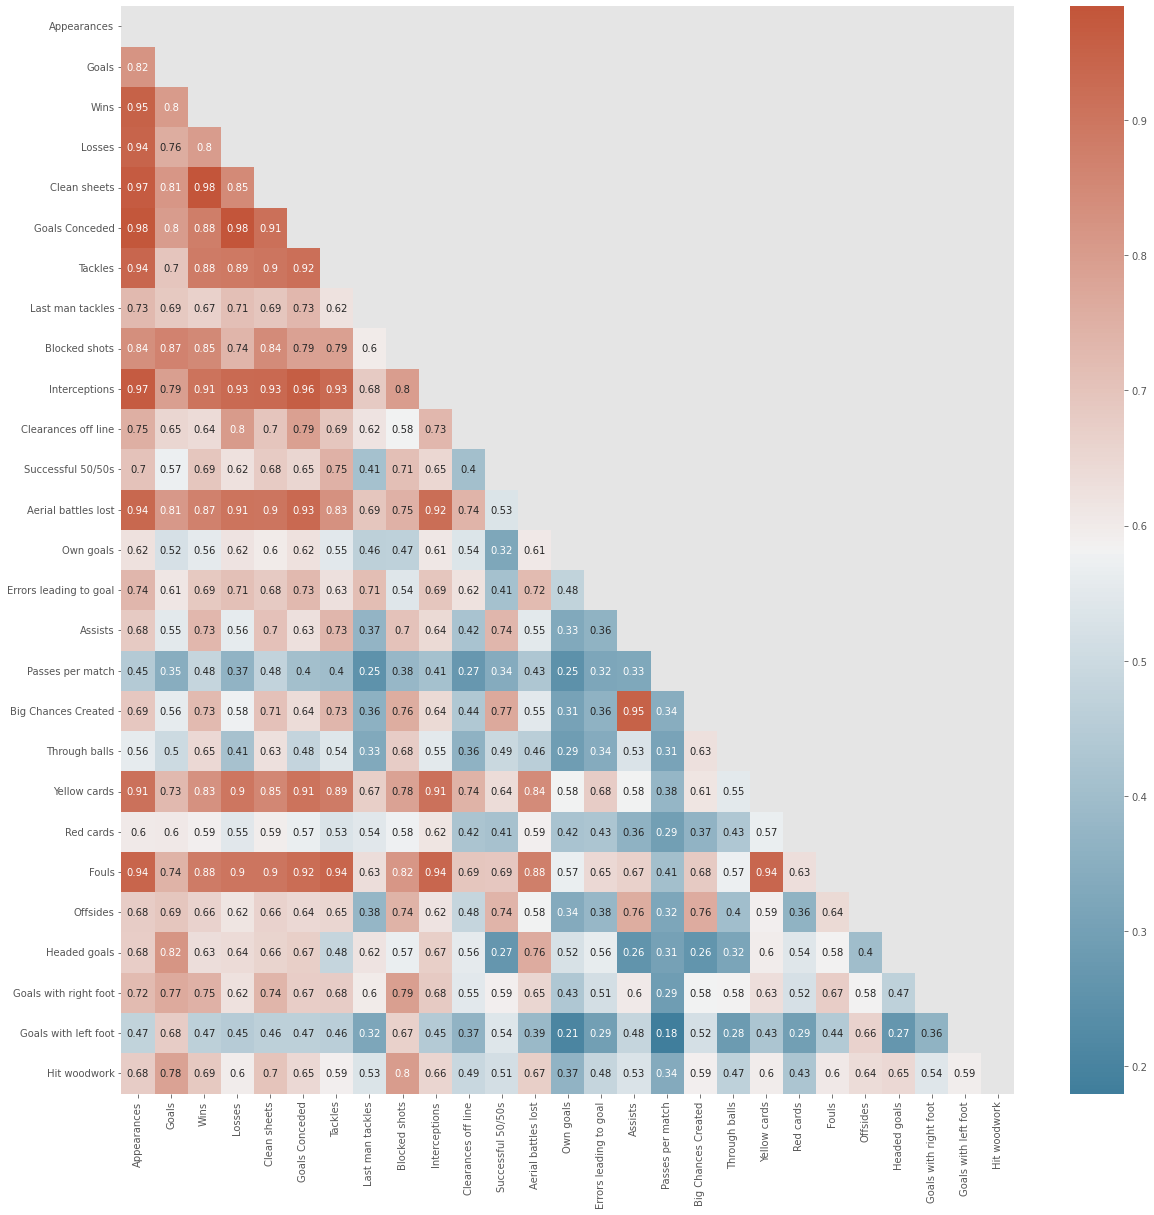

In [10]:
corr=def_data.corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# top 5 Goals

In [11]:
import plotly.express as px
Goals=pd.DataFrame(def_data.groupby(['Name'])['Goals'].sum())
Goals=Goals.sort_values(by=['Goals'])
Goals=Goals.tail(5)
fig = px.bar(Goals, y='Goals',color=Goals.index)
fig.show()


# top 5 players  most Yellow cards

In [12]:
import plotly.express as px
Yellow_cards=pd.DataFrame(def_data.groupby(['Name'])['Yellow cards'].sum())
Yellow_cards=Yellow_cards.sort_values(by=['Yellow cards'])
Yellow_cards=Yellow_cards.tail(5)
fig = px.bar(Yellow_cards, y='Yellow cards',color=Yellow_cards.index)
fig.show()



# top 5 players  most Red cards

In [13]:
import plotly.express as px
Red_cards=pd.DataFrame(def_data.groupby(['Name'])['Red cards'].sum())
Red_cards=Red_cards.sort_values(by=['Red cards'])
Red_cards=Red_cards.tail(5)
fig = px.bar(Red_cards, y='Red cards',color=Red_cards.index)
fig.show()



# top 15 players most Tackle success %

In [14]:
def_data['Tackle success %']=def_data['Tackle success %'].str.replace("%",'')
l=list(def_data['Tackle success %'])
for i in range(len(l)):
    l[i]=int(l[i])
def_data['Tackle success %']=l
Tackle_success=def_data[['Name','Tackle success %']]
Tackle_success=Tackle_success.sort_values(by=['Tackle success %'])
Tackle_success=Tackle_success.tail(15)
fig = px.bar(Tackle_success,x='Name', y='Tackle success %',color='Name')
fig.show()


# top 5 players most Duels won

In [15]:
import re
def_data['Duels won']=def_data['Duels won'].str.replace(',', '')
def_data['Duels won']=def_data['Duels won'].str.replace("'", '')
l=list(def_data['Duels won'])
for i in range(len(l)):
    l[i]=int(l[i])
def_data['Duels won']=l

Duels_wons=pd.DataFrame(def_data.groupby(['Name'])['Duels won'].sum())
Duels_wons=Duels_wons.sort_values(by=['Duels won'])
Duels_wons=Duels_wons.tail(5)
fig = px.bar(Duels_wons, y='Duels won',color=Duels_wons.index)
fig.show()

# top 5 players most Duels lost

In [16]:

def_data['Duels lost']=def_data['Duels lost'].str.replace(',', '')
l2=list(def_data['Duels lost'])
for i in range(len(l2)):
    l2[i]=int(l2[i])
def_data['Duels lost']=l2

Duels_lost=pd.DataFrame(def_data.groupby(['Name'])['Duels lost'].sum())
Duels_lost=Duels_lost.sort_values(by=['Duels lost'])
Duels_lost=Duels_lost.tail(5)
fig = px.bar(Duels_lost, y='Duels lost',color=Duels_lost.index)
fig.show()

# top 5 players most Aerial battles won

In [17]:

def_data['Aerial battles won']=def_data['Aerial battles won'].str.replace(',', '')
l3=list(def_data['Aerial battles won'])
for i in range(len(l3)):
    l3[i]=int(l3[i])
def_data['Aerial battles won']=l3

Aerial_battles_won=def_data[['Name','Aerial battles won']]
Aerial_battles_won=Aerial_battles_won.sort_values(by=['Aerial battles won'])
Aerial_battles_won=Aerial_battles_won.tail(5)
fig = px.bar(Aerial_battles_won, x='Name',y='Aerial battles won',color='Name')
fig.show()

# top 5 players most Aerial battles lost

In [18]:

l4=list(def_data['Aerial battles lost'])
for i in range(len(l4)):
    l4[i]=int(l4[i])
def_data['Aerial battles lost']=l4

Aerial_battles_lost=def_data[['Name','Aerial battles lost']]
Aerial_battles_lost=Aerial_battles_lost.sort_values(by=['Aerial battles lost'])
Aerial_battles_lost=Aerial_battles_lost.tail(5)
fig = px.bar(Aerial_battles_lost, x='Name',y='Aerial battles lost',color='Name')
fig.show()

# top 5 players most Errors leading to goal

In [19]:
l5=list(def_data['Errors leading to goal'])
for i in range(len(l5)):
    l5[i]=int(l5[i])
def_data['Errors leading to goal']=l5

Errors_leading_goal=def_data[['Name','Errors leading to goal']]
Errors_leading_goal=Errors_leading_goal.sort_values(by=['Errors leading to goal'])
Errors_leading_goal=Errors_leading_goal.tail(5)
fig = px.bar(Errors_leading_goal, x='Name',y='Errors leading to goal',color='Name')
fig.show()

# top 5 players most Passes per match

In [20]:
import math
l6=list(def_data['Passes per match'])
for i in range(len(l6)):
    l6[i]=math.floor(l6[i])
def_data['Passes per match']=l6

Passes_per_match=def_data[['Name','Passes per match']]
Passes_per_match=Passes_per_match.sort_values(by=['Passes per match'])
Passes_per_match=Passes_per_match.tail(5)
fig = px.bar(Passes_per_match, x='Name',y='Passes per match',color='Name')
fig.show()

# top 5 players most Duels won

In [21]:
Duel_won=def_data[['Name','Duels won']]
Duel_won=Duel_won.sort_values(by=['Duels won'])
Duel_won=Duel_won.tail(5)
fig = px.bar(Duel_won, x='Name',y='Duels won',color='Name')
fig.show()

# top 5 players most Duels lost

In [22]:
Duel_lost=def_data[['Name','Duels lost']]
Duel_lost=Duel_lost.sort_values(by=['Duels lost'])
Duel_lost=Duel_lost.tail(5)
fig = px.bar(Duel_lost, x='Name',y='Duels lost',color='Name')
fig.show()

# top 10 players most Cross accuracy %

In [23]:
def_data['Cross accuracy %']=def_data['Cross accuracy %'].str.replace("%",'')
l=list(def_data['Cross accuracy %'])
for i in range(len(l)):
    l[i]=int(l[i])
def_data['Cross accuracy %']=l
Cross_accuracy=def_data[['Name','Cross accuracy %']]
Cross_accuracy=Cross_accuracy.sort_values(by=['Cross accuracy %'])
Cross_accuracy=Cross_accuracy.tail(10)
fig = px.bar(Cross_accuracy,x='Name', y='Cross accuracy %',color='Name')
fig.show()


# fwd_data

In [24]:
fwd_data.isnull().sum()

Unnamed: 0                  0
Name                        0
Appearances                 0
Goals                       0
Wins                        0
Losses                      0
Goals per match             0
Headed goals                0
Goals with right foot       0
Goals with left foot        0
Penalties scored            0
Freekicks scored            0
Shots                       0
Shots on target             0
Shooting accuracy %         0
Hit woodwork                0
Big chances missed          0
Assists                     0
Passes                      0
Passes per match            0
Big Chances Created         0
Crosses                     0
Yellow cards                0
Red cards                   0
Fouls                       0
Offsides                    0
Tackles                     0
Blocked shots               0
Interceptions               0
Clearances                  0
Headed Clearance            0
Accurate long balls       175
Aerial battles lost       175
Aerial bat

In [25]:
fwd_data = fwd_data.drop(['Unnamed: 0','Accurate long balls', 'Aerial battles lost',
       'Aerial battles won', 'Cross accuracy %', 'Duels lost', 'Duels won',
       'Errors leading to goal', 'Recoveries', 'Successful 50/50s',
       'Tackle success %', 'Through balls'],axis=1)
fwd_data=fwd_data.dropna(axis=0)


<AxesSubplot:>

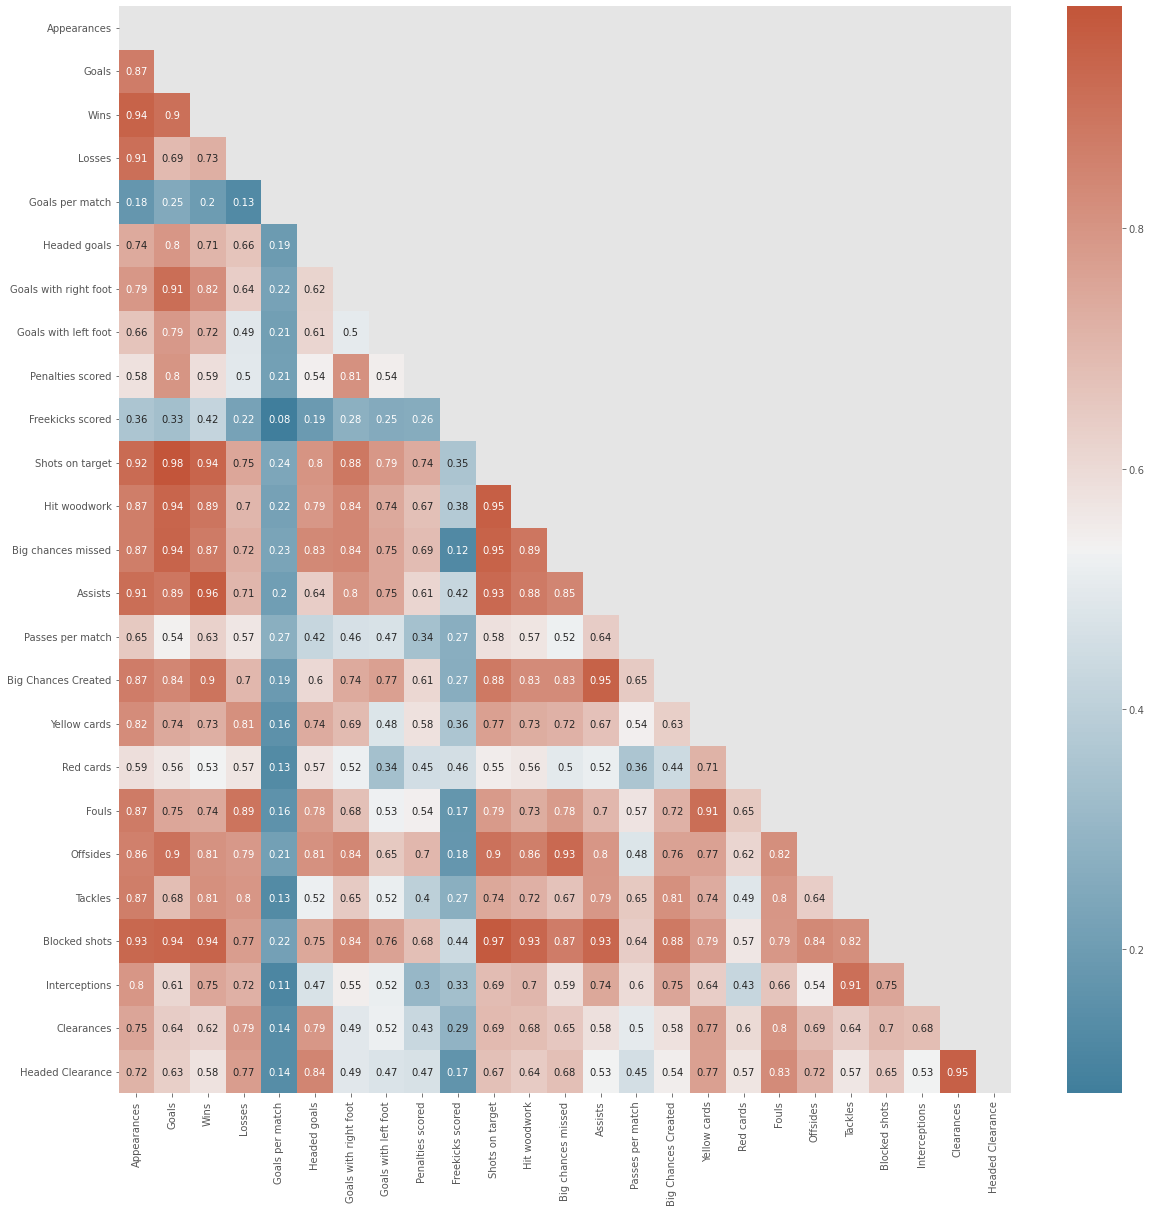

In [26]:
corr=fwd_data.corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# top 5 players most Goals

In [27]:
Goals=pd.DataFrame(fwd_data.groupby(['Name'])['Goals'].sum())
Goals=Goals.sort_values(by=['Goals'])
Goals=Goals.tail(5)
fig = px.bar(Goals, y='Goals',color=Goals.index)
fig.show()

# top 5 players most Yellow cards

In [28]:
Yellow_cards=pd.DataFrame(fwd_data.groupby(['Name'])['Yellow cards'].sum())
Yellow_cards=Yellow_cards.sort_values(by=['Yellow cards'])
Yellow_cards=Yellow_cards.tail(5)
fig = px.bar(Yellow_cards, y='Yellow cards',color=Yellow_cards.index)
fig.show()



# top 5 players most Red cards

In [29]:

Red_cards=pd.DataFrame(fwd_data.groupby(['Name'])['Red cards'].sum())
Red_cards=Red_cards.sort_values(by=['Red cards'])
Red_cards=Red_cards.tail(5)
fig = px.bar(Red_cards, y='Red cards',color=Red_cards.index)
fig.show()



# top 5 players most Fouls

In [30]:
Fouls=fwd_data[['Name','Fouls']]
Fouls=Fouls.sort_values(by=['Fouls'])
Fouls=Fouls.tail(5)
fig = px.bar(Fouls, x='Name',y='Fouls',color='Name')
fig.show()

# top 5 players most Offsides

In [31]:
Offsides=fwd_data[['Name','Offsides']]
Offsides=Offsides.sort_values(by=['Offsides'])
Offsides=Offsides.tail(5)
fig = px.bar(Offsides, x='Name',y='Offsides',color='Name')
fig.show()

# top 5 players most Losses

In [32]:
Losses=fwd_data[['Name','Losses']]
Losses=Losses.sort_values(by=['Losses'])
Losses=Losses.tail(5)
fig = px.bar(Losses, x='Name',y='Losses',color='Name')
fig.show()

# top 5 players most Passes per match

In [33]:
l6=list(fwd_data['Passes per match'])
for i in range(len(l6)):
    l6[i]=math.floor(l6[i])
fwd_data['Passes per match']=l6

Passes_per_match=fwd_data[['Name','Passes per match']]
Passes_per_match=Passes_per_match.sort_values(by=['Passes per match'])
Passes_per_match=Passes_per_match.tail(5)
fig = px.bar(Passes_per_match, x='Name',y='Passes per match',color='Name')
fig.show()

# top 10 players most Shooting accuracy %

In [34]:
fwd_data['Shooting accuracy %']=fwd_data['Shooting accuracy %'].str.replace("%",'')
l=list(fwd_data['Shooting accuracy %'])
for i in range(len(l)):
    l[i]=int(l[i])
fwd_data['Shooting accuracy %']=l
Shooting_accuracy=fwd_data[['Name','Shooting accuracy %']]
Shooting_accuracy=Shooting_accuracy.sort_values(by=['Shooting accuracy %'])
Shooting_accuracy=Shooting_accuracy.tail(10)
fig = px.bar(Shooting_accuracy,x='Name', y='Shooting accuracy %',color='Name')
fig.show()


# gk data

In [35]:
gk_data=gk_data.drop(['Unnamed: 0'],axis=1)
gk_data=gk_data.dropna(axis=0)

<AxesSubplot:>

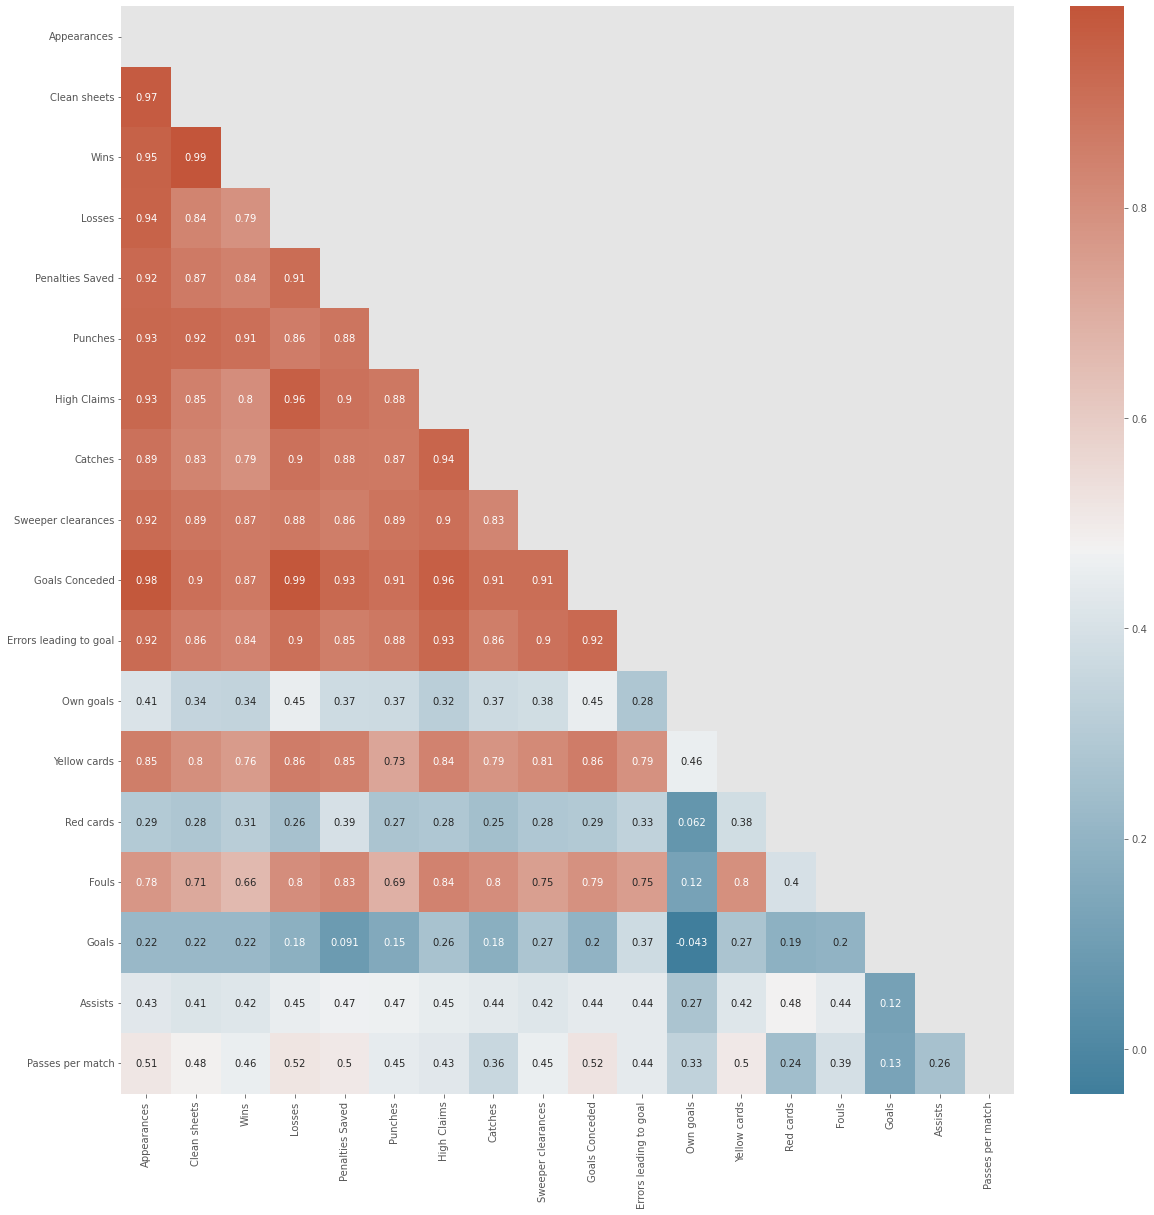

In [36]:
corr=gk_data.corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# top 5 players most Wins

In [37]:
wins=gk_data[['Name','Wins']]
wins=wins.sort_values(by=['Wins'])
wins=wins.tail(5)
fig = px.bar(wins,x='Name', y='Wins',color='Name')
fig.show()


# top 5 players most Losses

In [38]:
Losses=gk_data[['Name','Losses']]
Losses=Losses.sort_values(by=['Losses'])
Losses=Losses.tail(5)
fig = px.bar(Losses,x='Name', y='Losses',color='Name')
fig.show()


# top 5 players most Saves

In [39]:
gk_data['Saves']=gk_data['Saves'].str.replace(",",'')
l=list(gk_data['Saves'])
for i in range(len(l)):
    l[i]=int(l[i])
gk_data['Saves']=l
Saves=gk_data[['Name','Saves']]
Saves=Saves.sort_values(by=['Saves'])
Saves=Saves.tail(5)
fig = px.bar(Saves,x='Name', y='Saves',color='Name')
fig.show()


# top 5 players most Penalties Saved

In [40]:
l=list(gk_data['Penalties Saved'])
for i in range(len(l)):
    l[i]=int(l[i])
gk_data['Penalties Saved']=l
Penalties_Saved=gk_data[['Name','Penalties Saved']]
Penalties_Saved=Penalties_Saved.sort_values(by=['Penalties Saved'])
Penalties_Saved=Penalties_Saved.tail(5)
fig = px.bar(Penalties_Saved,x='Name', y='Penalties Saved',color='Name')
fig.show()


# top 5 players most Catches

In [41]:
l=list(gk_data['Catches'])
for i in range(len(l)):
    l[i]=int(l[i])
gk_data['Catches']=l
Catches=gk_data[['Name','Catches']]
Catches=Catches.sort_values(by=['Catches'])
Catches=Catches.tail(5)
fig = px.bar(Catches,x='Name', y='Catches',color='Name')
fig.show()


# top 5 players most Errors leading to goal

In [42]:
l=list(gk_data['Errors leading to goal'])
for i in range(len(l)):
    l[i]=int(l[i])
gk_data['Errors leading to goal']=l
Errors_goal=gk_data[['Name','Errors leading to goal']]
Errors_goal=Errors_goal.sort_values(by=['Errors leading to goal'])
Errors_goal=Errors_goal.tail(5)
fig = px.bar(Errors_goal,x='Name', y='Errors leading to goal',color='Name')
fig.show()


# top 5 players most Fouls

In [43]:
l=list(gk_data['Fouls'])
for i in range(len(l)):
    l[i]=int(l[i])
gk_data['Fouls']=l
Fouls=gk_data[['Name','Fouls']]
Fouls=Fouls.sort_values(by=['Fouls'])
Fouls=Fouls.tail(5)
fig = px.bar(Fouls,x='Name', y='Fouls',color='Name')
fig.show()


# mid data set :

Analysis of Top 5 most valuable players: 

        - Goals + assists 
        - Yellow/red card ratio (higher = the worse)
        - Fouls and offsides (higher = the worse)
        - Duel won/lost ratio 
        - Passes per match 
        - Through balls + Interceptions score  
        - Passes accuracy
        - Duel won/ lost ratio

In [44]:
mid_data=mid_data.drop(['Unnamed: 0'],axis=1)
mid_data=mid_data.dropna(axis=0)

<AxesSubplot:>

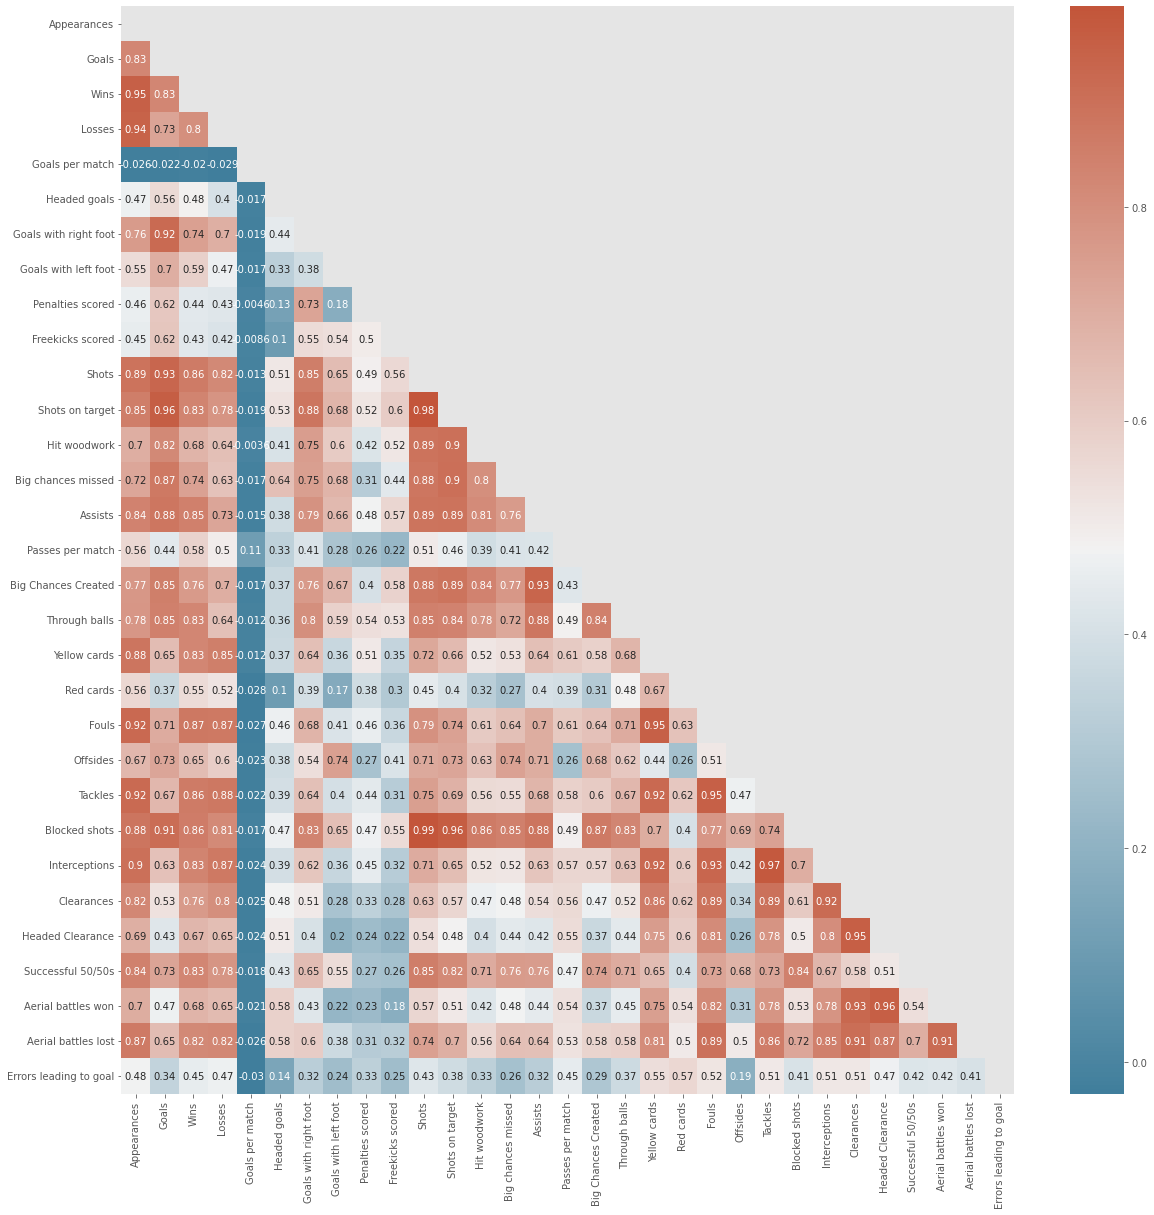

In [45]:
corr=mid_data.corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# top 5 players most Goals

In [46]:
Goals=pd.DataFrame(mid_data.groupby(['Name'])['Goals'].sum())
Goals=Goals.sort_values(by=['Goals'])
Goals=Goals.tail(5)
fig = px.bar(Goals, y='Goals',color=Goals.index)
fig.show()

# top 5 players most Assists

In [47]:
Assists=pd.DataFrame(mid_data.groupby(['Name'])['Assists'].sum())
Assists=Assists.sort_values(by=['Assists'])
Assists=Assists.tail(5)
fig = px.bar(Assists, y='Assists',color=Goals.index)
fig.show()

# top 5 players most Yellow cards

In [48]:
Yellow_cards=pd.DataFrame(mid_data.groupby(['Name'])['Yellow cards'].sum())
Yellow_cards=Yellow_cards.sort_values(by=['Yellow cards'])
Yellow_cards=Yellow_cards.tail(5)
fig = px.bar(Yellow_cards, y='Yellow cards',color=Yellow_cards.index)
fig.show()



# top 5 players most Red cards

In [49]:

Red_cards=pd.DataFrame(mid_data.groupby(['Name'])['Red cards'].sum())
Red_cards=Red_cards.sort_values(by=['Red cards'])
Red_cards=Red_cards.tail(5)
fig = px.bar(Red_cards, y='Red cards',color=Red_cards.index)
fig.show()



# top 5 players most Fouls

In [50]:
Fouls=mid_data[['Name','Fouls']]
Fouls=Fouls.sort_values(by=['Fouls'])
Fouls=Fouls.tail(5)
fig = px.bar(Fouls,x='Name', y='Fouls',color='Name')
fig.show()


# top 5 players most Offsides

In [51]:
Offsides=mid_data[['Name','Offsides']]
Offsides=Offsides.sort_values(by=['Offsides'])
Offsides=Offsides.tail(5)
fig = px.bar(Offsides, x='Name',y='Offsides',color='Name')
fig.show()

# top 5 players most Duels won

In [52]:
mid_data['Duels won']=mid_data['Duels won'].str.replace(",",'')
l=[]
for i in mid_data['Duels won']:
    i=int(i)
    l.append(i)
mid_data['Duels won']=l    

In [53]:
Duel_won=mid_data[['Name','Duels won']]
Duel_won=Duel_won.sort_values(by=['Duels won'])
Duel_won=Duel_won.tail(5)
fig = px.bar(Duel_won, x='Name',y='Duels won',color='Name')
fig.show()


# top 5 players most Duels lost

In [54]:
mid_data['Duels lost']=mid_data['Duels lost'].str.replace(",",'')
l=[]
for i in mid_data['Duels lost']:
    i=int(i)
    l.append(i)
mid_data['Duels lost']=l 

In [55]:
Duel_lost=mid_data[['Name','Duels lost']]
Duel_lost=Duel_lost.sort_values(by=['Duels lost'])
Duel_lost=Duel_lost.tail(5)
fig = px.bar(Duel_lost, x='Name',y='Duels lost',color='Name')
fig.show()

# top 5 players most Passes per match

In [56]:
l6=list(mid_data['Passes per match'])
for i in range(len(l6)):
    l6[i]=math.floor(l6[i])
mid_data['Passes per match']=l6

Passes_per_match=mid_data[['Name','Passes per match']]
Passes_per_match=Passes_per_match.sort_values(by=['Passes per match'])
Passes_per_match=Passes_per_match.tail(5)
fig = px.bar(Passes_per_match, x='Name',y='Passes per match',color='Name')
fig.show()

# top 5 players most Through balls

In [57]:
l6=list(mid_data['Through balls'])
for i in range(len(l6)):
    l6[i]=int(l6[i])
mid_data['Through balls']=l6

Through_balls=mid_data[['Name','Through balls']]
Through_balls=Through_balls.sort_values(by=['Through balls'])
Through_balls=Through_balls.tail(5)
fig = px.bar(Through_balls, x='Name',y='Through balls',color='Name')
fig.show()

# top 5 players most Interceptions

In [58]:
Interceptions=mid_data[['Name','Interceptions']]
Interceptions=Interceptions.sort_values(by=['Interceptions'])
Interceptions=Interceptions.tail(5)
fig = px.bar(Interceptions, x='Name',y='Interceptions',color='Name')
fig.show()

# top 5 players most Passes per match'

In [59]:
Passes_per_match=mid_data[['Name','Passes per match']]
Passes_per_match=Passes_per_match.sort_values(by=['Passes per match'])
Passes_per_match=Passes_per_match.tail(5)
fig = px.bar(Passes_per_match, x='Name',y='Passes per match',color='Name')
fig.show()

# Data preprocessing:

for machine learning implementation we are using defenders data to predict goals conceded by the player

In [60]:
a=def_data.select_dtypes(include='object')

In [61]:
#cleaning data
for i in a.columns:
    def_data[i]=def_data[i].str.replace("%",'')
    def_data[i]=def_data[i].str.replace(",",'')
    

# defining inputs and output as X and y respectively

In [62]:
X = def_data.drop(['Goals Conceded','Name'],axis=1)
y = def_data['Goals Conceded']


# Scaling input features

In [63]:

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
X


Appearances     Goals      Wins    Losses  Clean sheets   Tackles  \
0      -0.256438 -0.516374 -0.138744 -0.332310     -0.158238 -0.197278   
1      -0.588723 -0.516374 -0.446074 -0.653625     -0.504855 -0.614223   
2      -0.655180 -0.516374 -0.630472 -0.582222     -0.653406 -0.569550   
3       4.528473  6.258730  4.624870  4.130400      4.446818  2.944705   
4      -0.695054 -0.516374 -0.630472 -0.689327     -0.653406 -0.658896   
..           ...       ...       ...       ...           ...       ...   
271     0.248636  0.693466  0.322251  0.096110     -0.009688 -0.063259   
272    -0.708346 -0.516374 -0.661205 -0.689327     -0.653406 -0.658896   
273    -0.708346 -0.516374 -0.661205 -0.689327     -0.653406 -0.658896   
274    -0.189981 -0.516374 -0.384608 -0.010995     -0.554372  0.078204   
275     0.102431 -0.032438  0.107120  0.167513     -0.207755 -0.055814   

     Tackle success %  Last man tackles  Blocked shots  Interceptions  ...  \
0            0.310105         -0.413519       0.084628      -0.230457  ...   
1            0.780546         -0.413519      -0.401982      -0.605535  ...   
2            0.498281         -0.413519      -0.483083      -0.605535  ...   
3            1.031448          8.403491       4.788518       3.398201  ...   
4           -1.320758         -0.413519      -0.564185      -0.657871  ...   
..                ...               ...            ...            ...  ...   
271          0.561007          0.076315       0.165729      -0.056002  ...   
272         -1.320758         -0.413519      -0.564185      -0.657871  ...   
273         -1.320758         -0.413519      -0.564185      -0.657871  ...   
274          0.811909         -0.413519       0.003526      -0.300239  ...   
275          0.623732         -0.413519      -0.239778      -0.090893  ...   

     Through balls  Accurate long balls  Yellow cards  Red cards     Fouls  \
0        -0.203931            -0.401542     -0.213296  -0.446520 -0.189627   
1        -0.203931            -0.509068     -0.632595  -0.446520 -0.602982   
2        -0.354023            -0.588543     -0.632595  -0.446520 -0.587084   
3         0.546534             3.586238      2.805660   4.117906  3.753144   
4        -0.354023            -0.597893     -0.632595  -0.446520 -0.666575   
..             ...                  ...           ...        ...       ...   
271      -0.203931             0.383859      0.122144  -0.446520  0.223728   
272      -0.354023            -0.597893     -0.632595  -0.446520 -0.666575   
273      -0.354023            -0.597893     -0.632595  -0.446520 -0.666575   
274      -0.354023            -0.424917     -0.213296  -0.446520 -0.332712   
275      -0.354023            -0.139742      0.038284   1.074955  0.048847   

     Offsides  Headed goals  Goals with right foot  Goals with left foot  \
0   -0.293683     -0.426606              -0.426264             -0.313002   
1   -0.519468     -0.426606              -0.426264             -0.313002   
2   -0.519468     -0.426606              -0.426264             -0.313002   
3    0.835238      4.084626               8.118070              2.086680   
4   -0.519468     -0.426606              -0.426264             -0.313002   
..        ...           ...                    ...                   ...   
271  0.383670      1.377887               0.230992             -0.313002   
272 -0.519468     -0.426606              -0.426264             -0.313002   
273 -0.519468     -0.426606              -0.426264             -0.313002   
274  0.835238     -0.426606              -0.426264             -0.313002   
275 -0.293683      0.475641              -0.426264             -0.313002   

     Hit woodwork  
0       -0.458332  
1       -0.458332  
2       -0.458332  
3        2.340333  
4       -0.458332  
..            ...  
271     -0.458332  
272     -0.458332  
273     -0.458332  
274     -0.458332  
275     -0.458332  

[276 rows x 37 columns]

In [64]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score



def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    r2_score = metrics.r2_score(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('r2_score:', r2_score)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    r2_score = metrics.r2_score(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    return mae, mse, rmse,r2_score

# splitting the dataset into testing and training respectively

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Modeling
Model 1:LinearRegression

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(copy_X= True, fit_intercept= True, positive=False)
lin_reg.fit(X_train,y_train)
# print the intercept
print(lin_reg.intercept_)

63.889549667062965


In [67]:
#Coefficient terms of linear regression
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Appearances               86.583676
Goals                     59.563199
Wins                     -24.161112
Losses                    31.067559
Clean sheets             -13.628617
Tackles                  -12.376671
Tackle success %          -1.221890
Last man tackles          -3.367268
Blocked shots              4.930065
Interceptions              9.463306
Clearances                -9.682706
Headed Clearance          18.845830
Clearances off line        2.140934
Recoveries                 0.750020
Duels won                 23.745986
Duels lost                -9.585262
Successful 50/50s         -3.534413
Aerial battles won       -13.308394
Aerial battles lost       -2.907337
Own goals                 -0.278132
Errors leading to goal     0.839827
Assists                    7.547084
Passes                    13.898412
Passes per match           0.496066
Big Chances Created        2.825995
Crosses                   -8.753661
Cross accuracy %           0.526406
Through balls              2.376542
Accurate long balls      -11.773216
Yellow cards              -0.093989
Red cards                 -2.469427
Fouls                     -1.741448
Offsides                  -3.418131
Headed goals             -33.875491
Goals with right foot    -20.212991
Goals with left foot     -22.262241
Hit woodwork               2.564262

# Actual vs predicted values for linear regression

In [68]:

#test data prediction
pred_linear = lin_reg.predict(X_test)
fig = px.scatter(x=y_test, y=pred_linear)
fig.show()


In [69]:
#calling the evaluation function that we created earlier for the test and train predictions
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.7235258138258045
MSE: 105.47909700408378
RMSE: 10.270301699759544
r2_score: 0.9850276924111967
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.048191842701582
MSE: 40.32298335407522
RMSE: 6.350038059261946
r2_score: 0.9955856420644812
__________________________________


# test set evaluations

In [70]:
#data frame of evaluations
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df

Model       MAE         MSE       RMSE  R2square
0  Linear Regression  5.723526  105.479097  10.270302  0.985028

# Model 2:RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.991134020618558
MSE: 211.3749835051547
RMSE: 14.538740781276578
r2_score: 0.969996223332336
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.1435754189944123
MSE: 43.19030502793295
RMSE: 6.5719331271653205
r2_score: 0.9952717420716772
__________________________________


In [72]:
#test data prediction
pred_rf = rf_reg.predict(X_test)
fig = px.scatter(x=y_test, y=pred_rf)
fig.show()

# Actual vs predicted values for RandomForestRegressor

In [73]:
results_df_2 = pd.DataFrame(data=[["Random forest Regression", *evaluate(y_test, pred_rf) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE         MSE       RMSE  R2square
0         Linear Regression  5.723526  105.479097  10.270302  0.985028
1  Random forest Regression  6.991134  211.374984  14.538741  0.969996

# Model 3:SVR

In [74]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 37.698479974374706
MSE: 5591.15350771991
RMSE: 74.77401626046249
r2_score: 0.20635962506810457
__________________________________
Train set evaluation:
_____________________________________
MAE: 45.61397381914609
MSE: 8042.912438700849
RMSE: 89.68228609207533
r2_score: 0.11950229384816502
__________________________________


# Actual vs predicted values for SVR Regressor

In [75]:
pred_svm = svm_reg.predict(X_test)
fig = px.scatter(x=y_test, y=pred_svm)
fig.show()

In [76]:
results_df_2 = pd.DataFrame(data=[["SVM Regression", *evaluate(y_test, pred_svm) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2square
0         Linear Regression   5.723526   105.479097  10.270302  0.985028
1  Random forest Regression   6.991134   211.374984  14.538741  0.969996
2            SVM Regression  37.698480  5591.153508  74.774016  0.206360

# Model 4:XGBRegressor

In [77]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

test_pred = xgb_reg.predict(X_test)
train_pred = xgb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.806387754840563
MSE: 267.73841627516344
RMSE: 16.362714208686878
r2_score: 0.9619956746344198
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.00047246677846416596
MSE: 8.737051385146389e-07
RMSE: 0.0009347219578648182
r2_score: 0.9999999999043512
__________________________________


# Actual vs predicted values for XGBRegressor

In [78]:
pred_xgb = xgb_reg.predict(X_test)
fig = px.scatter(x=y_test, y=pred_xgb)
fig.show()

# Model 5:DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

test_pred = dt_reg.predict(X_test)
train_pred = dt_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')


Test set evaluation:
_____________________________________
MAE: 9.092783505154639
MSE: 319.64948453608247
RMSE: 17.878743930603246
r2_score: 0.9546271200739295
__________________________________


In [80]:
pred_dt= dt_reg.predict(X_test)
fig = px.scatter(x=y_test, y=pred_dt)
fig.show()

# Model 6:GradientBoostingRegressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.7450732561209605
MSE: 271.8658964345817
RMSE: 16.488356389724892
r2_score: 0.9614097964436812
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5996057444963291
MSE: 0.7837504072318532
RMSE: 0.8852967904786808
r2_score: 0.999914198937136
__________________________________


In [82]:
pred_gb= gb_reg.predict(X_test)
fig = px.scatter(x=y_test, y=pred_gb)
fig.show()

In [83]:
results_df_2 = pd.DataFrame(data=[["Gradient boosting Regression", *evaluate(y_test, pred_gb) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2square
0             Linear Regression   5.723526   105.479097  10.270302  0.985028
1      Random forest Regression   6.991134   211.374984  14.538741  0.969996
2                SVM Regression  37.698480  5591.153508  74.774016  0.206360
3  Gradient boosting Regression   6.745073   271.865896  16.488356  0.961410

# Model 7:BaggingRegressor

In [84]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor()
bagging_reg.fit(X_train, y_train)

test_pred = bagging_reg.predict(X_test)
train_pred = bagging_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 9.71340206185567
MSE: 406.4317525773196
RMSE: 20.160152593106027
r2_score: 0.9423087475501576
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.154748603351955
MSE: 74.46977653631284
RMSE: 8.629587274969344
r2_score: 0.9918474224458355
__________________________________


In [85]:
pred_bagging= bagging_reg.predict(X_test)
fig = px.scatter(x=y_test, y=pred_bagging)
fig.show()

In [86]:
results_df_2 = pd.DataFrame(data=[["Bagging Regression", *evaluate(y_test, pred_bagging) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE','R2square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2square
0             Linear Regression   5.723526   105.479097  10.270302  0.985028
1      Random forest Regression   6.991134   211.374984  14.538741  0.969996
2                SVM Regression  37.698480  5591.153508  74.774016  0.206360
3  Gradient boosting Regression   6.745073   271.865896  16.488356  0.961410
4            Bagging Regression   9.713402   406.431753  20.160153  0.942309

# Evaluation for all the models on test data

<AxesSubplot:ylabel='Model'>

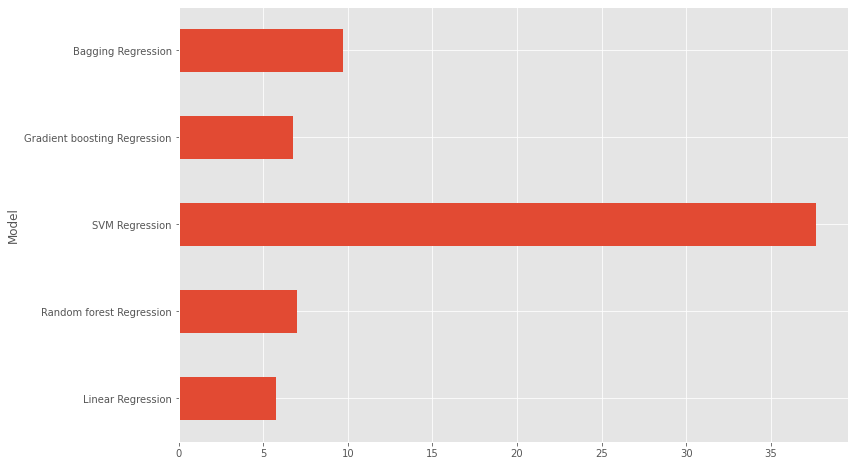

In [87]:
results_df.set_index('Model', inplace=True)
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

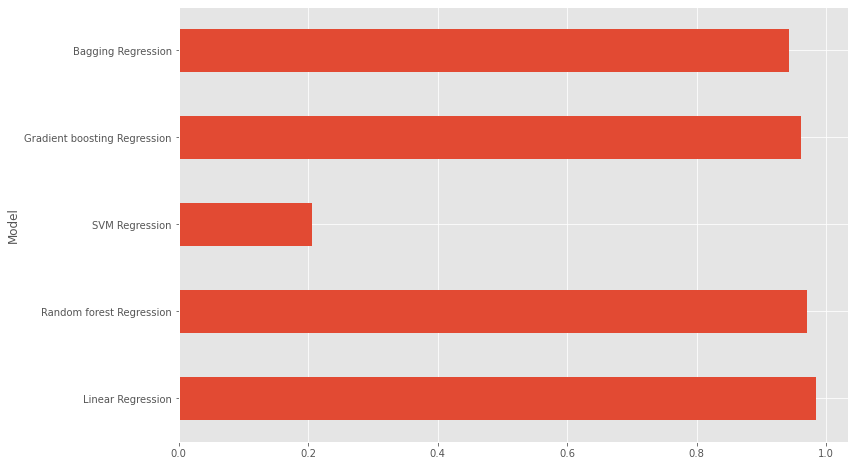

In [88]:
results_df['R2square'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

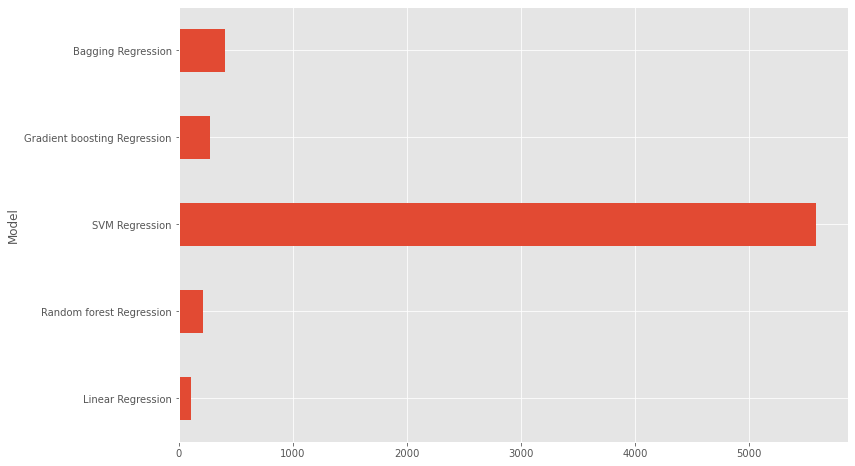

In [89]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

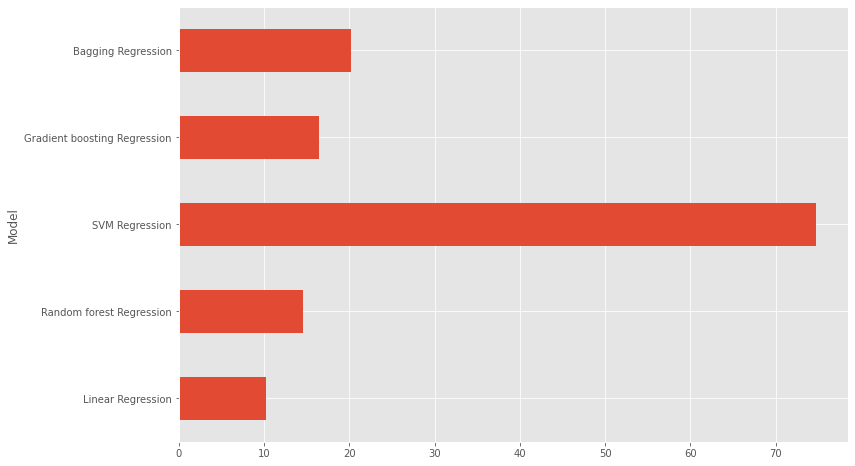

In [90]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))